# Homework 1: U.S. Boundary Currents

Name: 

Date: 

#### Overview
In class, we examined the general structure of ocean circulation on large scales and saw that major ocean basins contain gyres - large circulation cells in the ocean. Further, we saw that vertical motion is driven by changes in density. In this homework, you will examine the structure of the ocean currents along the east and west coasts of the U.S and consider how these currents fit into the broader ocean circulation.

#### Import Modules
To begin, import the modules required to access data from netCDF files and make plots:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import netCDF4 as nc4

### Part 1: Horizonal Velocity Structure
First, examine the mean velocity on the west and east coasts of the U.S. Begin by loading in both the `EVEL` and `NVEL` fields from the `EVEL_2015_12.nc` and `VVEL_2015_12.nc` files, respectively -- these fields represent the zonal (eastward-flowing) and meridional (westward-flowing) velocity in the model. 

In [2]:
# read in the EVEL and VVEL files to an xarray dataset
# note that these files must be in the same folder as this notebook
ds_evel=xr.open_dataset('EVEL_2015_12.nc')
ds_nvel=xr.open_dataset('NVEL_2015_12.nc')

In [3]:
# store the velocity components and longitude/latitude data
# into numpy arrays

evel=np.array(ds_evel['EVEL'])
nvel=np.array(ds_nvel['NVEL'])
longitude=np.array(ds_evel['longitude'])
latitude=np.array(ds_evel['latitude'])



Now that you have the data read in, make a plot of the eastward and northward velocity at the surface of the ocean. Be sure to add a title to each plot and some labels for the x and y axes.

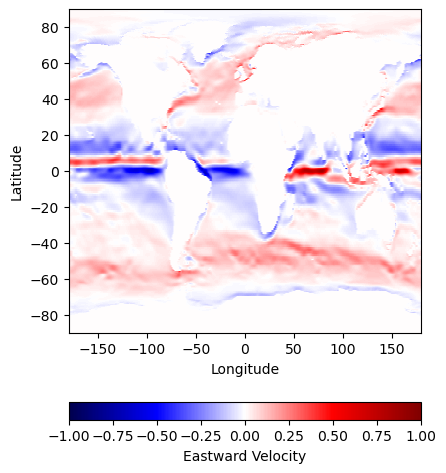

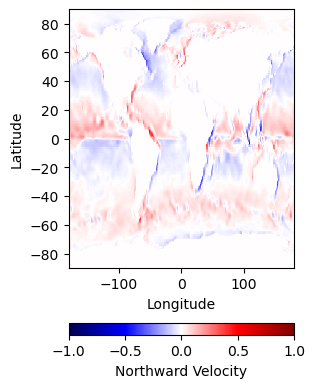

In [8]:
# make a plot of the velocity components (one for each)
# use a divergent colormap (such as seismic) to visualize the data
# for interpretation, it will likely be helpful to adjust the data
# bounds to be +/- 0.5 or even +/- 0.1

# make a figure


# make a subplot for the eastward velocity at the surface



# make a subplot for the northward velocity at the surface


fig = plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.pcolormesh(longitude, latitude, evel[0,0,:,:], vmin=-1, vmax=1, cmap='seismic')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Eastward Velocity', orientation='horizontal')
plt.show()
plt.subplot(1,2,2)
plt.pcolormesh(longitude, latitude, nvel[0,0,:,:], vmin=-1, vmax=1, cmap='seismic')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Northward Velocity', orientation='horizontal')
plt.show()

### Questions:
1. What direction are the surface currents moving (roughly) at:
    - 30$^{\circ}$N on the east cost of the U.S.? the west coast?
    - 45$^{\circ}$N on the east cost of the U.S.? the west coast?
2. Which current flows faster? East coast or west coast?
2. Explain how these currents are part of the gyres in the North Atlantic and North Pacific.

1. At 30 degrees: East coast are moving north and the west coast moving south.
   At 45 degrees: East coast are moving east and the west coast is moving east
2. The currents on the east coast are moving much faster
3. The currents on the east coast are the western boundary currents of the gyre and the west coast currents are the eastern boundary currents in the northern hemisphere
    

# change this cell to a markdown and input your response here

### Part 2: Horizonal Temperature Structure
Next, examine the mean temperature on the coasts of the U.S. Load in the temperature field `THETA` from the `THETA_2015_12.nc` file. 

In [9]:
# read in the THETA file to an xarray dataset
# note that this file must be in the same folder as this notebook
ds_theta=xr.open_dataset('THETA_2015_12.nc')

In [10]:
# store the THETA grid into a into numpy array
theta=np.array(ds_theta['THETA'])
longitude=np.array(ds_theta['longitude'])
latitude=np.array(ds_theta['latitude'])

Similar to your plot above, make a plot of the temperature at the surface of the ocean. 

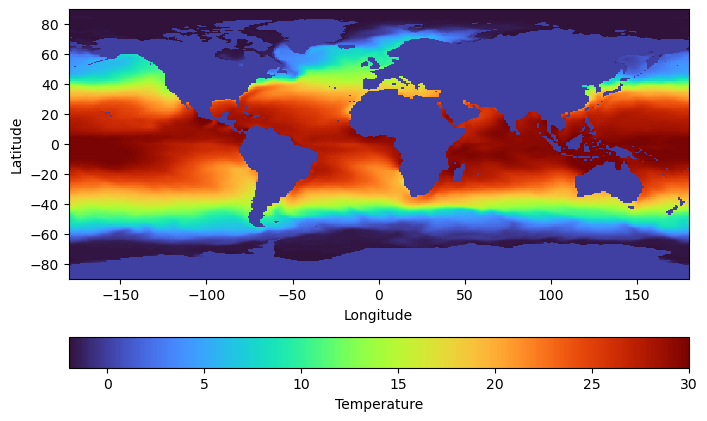

In [11]:
# make a plot of the temperature
# set the data bounds to -2 to 32 with a 
# sensible color map to visualize the data

# make a figure
fig = plt.figure(figsize=(8,5))
plt.pcolormesh(longitude, latitude, theta[0,0,:,:], vmin=-2, vmax=30, cmap='turbo')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Temperature', orientation='horizontal')
plt.show()
# plot the data



### Questions:
1. How does the temperature on the west cost of the U.S. compare to the east coast at the same latitude?
2. How might ocean currents contribute to this temperature regime?

1. The temperatures on the east coast are much colder than that of the west coast in higher latitudes but warmer at lower latitudes.
2. This is caused by the higher velocities of the gulf steam bringing warmer water up to higher latitudes as well as the california current bringing colder water down from alaska 

### Part 3: Vertical Structure
Next, look at the vertical structure of ocean currents as well as temperature on the U.S coast. Being by loading in the vertical velocity field `WVELSTAR` from the `WVELSTAR_2015_12.nc` file. This variable estimates the speed at which water is moving in the vertical direction.

In [15]:
# read in the WVELSTAR file to an xarray dataset
# note that this file must be in the same folder as this notebook
ds_wvelstar=xr.open_dataset('WVELSTAR_2015_12.nc')

In [51]:
# store the WVELSTAR grid into a into numpy array
wvelstar=np.array(ds_wvelstar['WVELSTAR'])
longitude=np.array(ds_wvelstar['longitude'])
latitude=np.array(ds_wvelstar['latitude'])

Since we'll be plotting a vertical profile, we'll also need a depth variable. Read this variable into a numpy array in the same way you read in the data above.

In [18]:
# read in the depth variable to a numpy array
# Hint: Look at the metadata for the WVELSTAR
# What is the name of the depth variable?

ds_wvelstar
Zl



<xarray.Dataset> Size: 104MB
Dimensions:    (time: 1, k_l: 50, j: 360, i: 720, nv: 2)
Coordinates:
  * i          (i) int64 6kB 0 1 2 3 4 5 6 7 ... 712 713 714 715 716 717 718 719
  * j          (j) int64 3kB 0 1 2 3 4 5 6 7 ... 352 353 354 355 356 357 358 359
  * k_l        (k_l) int64 400B 0 1 2 3 4 5 6 7 8 ... 41 42 43 44 45 46 47 48 49
  * time       (time) datetime64[ns] 8B 2015-12-16T12:00:00
    latitude   (j) float64 3kB ...
    longitude  (i) float64 6kB ...
    timestep   (time) int64 8B ...
    Zl         (k_l) float32 200B ...
    time_bnds  (time, nv) datetime64[ns] 16B ...
Dimensions without coordinates: nv
Data variables:
    WVELSTAR   (time, k_l, j, i) float64 104MB ...
Attributes: (12/20)
    product_time_coverage_start:  1992-01-01T12:00:00
    author:                       Ou Wang and Ian Fenty
    Insitution:                   JPL
    product_version:              ECCO Version 4 Release 4
    time_units:                   days since 1992-01-01 00:00:00
    Conventions:                  CF-1.6
    ...                           ...
    nz:                           50
    geospatial_vertical_units:    meter
    geospatial_vertical_max:      0.0
    date_created:                 Tue Aug 27 18:20:19 2019
    time_coverage_start:          2015-12-01T00:00:00
    time_coverage_end:            2016-01-01T00:00:00

In [20]:
Zl = np.array(ds_wvelstar['Zl'])

Next, create side-by-side plots of vertical velocity and temperature along the row corresponding to the latitude 40$^{\circ}$N i.e. index 259 along the latitude axis.

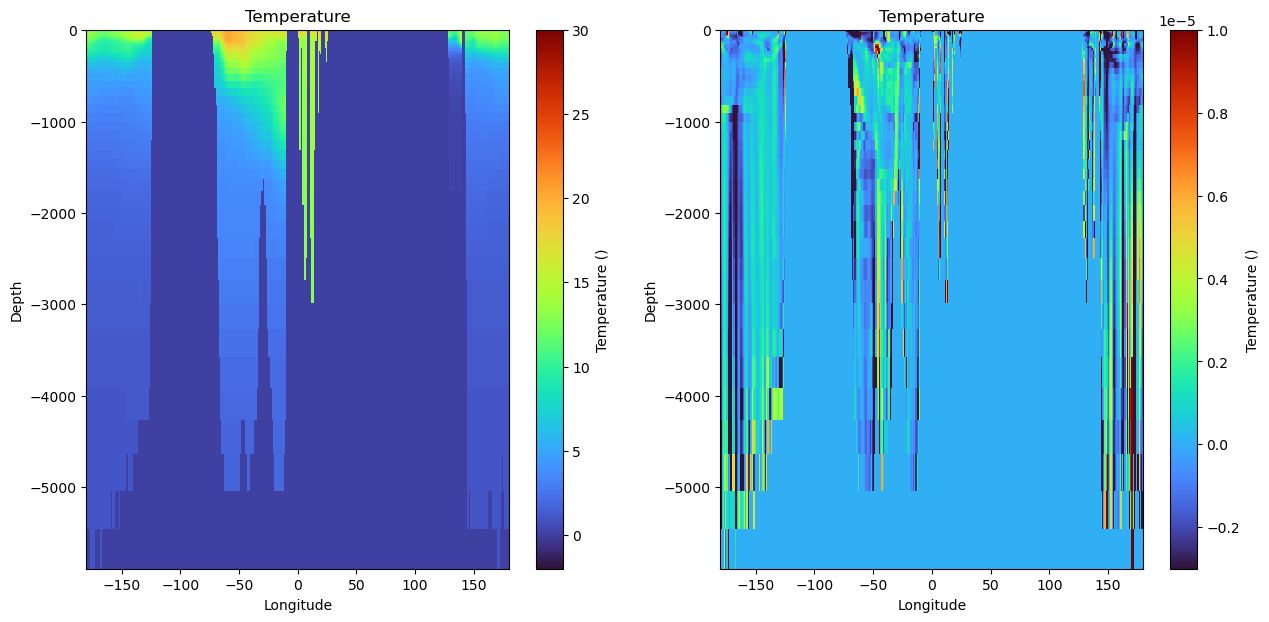

In [70]:
# make a figure
#fig = plt.figure(figsize=(10,10))

# make subplot the vertical velocity
# use a divergent colorbar
# you will need to adjust the color bounds appropriately for this data
# try a few values and see what works
#plt.subplot(2,1,1)


# make a subplot of the vertical profile of temperature
#plt.subplot(2,1,2)



fig = plt.figure(figsize=(15,7)) 
plt.subplot(1,2,1)
temp = plt.pcolormesh(longitude, Zl, theta[0, :, 259, :], vmin=-2, vmax=30, cmap='turbo', shading='auto')
plt.colorbar(temp, label='Temperature ()' )
plt.title('Temperature')
plt.ylabel('Depth')
plt.xlabel('Longitude');
plt.subplot(1,2,2)
velocity = plt.pcolormesh(longitude, Zl, wvelstar[0, :, 259, :], vmin=-3e-6, vmax=1e-5, cmap='turbo', shading='auto')
plt.colorbar(velocity, label='Temperature ()' )
plt.title('Temperature')
plt.ylabel('Depth')
plt.xlabel('Longitude');
plt.show()





### Questions:
1. How does the vertical velocity in the current on the west coast compare to that on the east?
2. How does the speed of vertical velocity compare to horizontal velocity? Why are they different? In other words, what are the forcing mechanisms associated with each?
3. How might the vertical currents adjacent to the coastline contribute to the differences in surface temperature?
4. Challenge question: On the west coast of the U.S., the prevailing winds tend to flow south in the spring time. How might these winds contribute to the vertical velocity identified in question 1?

1. The vertical velocity of the current on the west coast is much higher than that of the east coast.
2. The vertical velocity on the west coast is much higher than horizontal velocity where as the east coast is opposite. This is because the forcing mechanisms are different, west coast is wind driven and east coast is heat transfer driven.
3. Vertical currents bring colder water to the surface causing the water to never warm due to the sun. whereas horizontal currents keep water near the surface to be constantly warmed by the sun.
4. These prevailing winds cause upwelling due to the coriolis force moving surface waters offshore and deeper colder waters up onto the shelf. This is the main driver of vertical velocity currents along the west coast. 